You are provided with a dataset (http://pitt.edu/~kpele/movies.csv) that
includes information about various movies such as budget, IMBD score,
duration etc.
1. Provide a good clustering for the data and a description of them (i.e.,
what type of movies do they include) (25 points)
Hint: Examine up to 20 clusters.
2. As you will observe, the various features of the data are in different
scales. In these cases, normalizing the data helps into obtaining better
models – either supervised or unsupervised. Use the
sklearn.preprocessing.normalize function to normalize the data and
perform the clustering again. What do you observe? (25 points)
3. Visualize the data on a 2D scatter plot, where each point corresponds
to a movie and movies that belong to the same cluster have the same
color. What do you observe with regards to their visual separability?
(25 points)

In [1]:
import matplotlib.pyplot as plt  
import pandas as pd  
import numpy as np 
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples

df = pd.read_csv("http://pitt.edu/~kpele/movies.csv")
data = df.iloc[:, :].values
df

,budget,gross,runtime,score,votes
0,8000000,52287414,89,8.1,299174
1,6000000,70136369,103,7.8,264740
2,15000000,179800601,110,6.9,236909
3,18500000,85160248,137,8.4,540152
4,9000000,18564613,90,6.9,36636
...,...,...,...,...,...
6815,0,4750497,91,5.4,9161
6816,0,28368,90,4.9,1959
6817,3500000,3775000,76,6.5,36333
6818,0,25981,76,6.2,6947


- Single Linkage — Distances between the most similar members for each pair of clusters are calculated and then clusters are merged based on the shortest distance
- Average Linkage — Distance between all members of one cluster is calculated to all other members in a different cluster. The average of these distances is then utilized to decide which clusters will merge
- Complete Linkage — Distances between the most dissimilar members for each pair of clusters are calculated and then clusters are merged based on the shortest distance
- Median Linkage — Similar to the average linkage, but instead of using the average distance, we utilize the median distance
- Ward Linkage — Uses the analysis of variance method to determine the distance between clusters
- Centroid Linkage — Calculates the centroid of each cluster by taking the average of all points assigned to the cluster and then calculates the distance to other clusters using this centroid

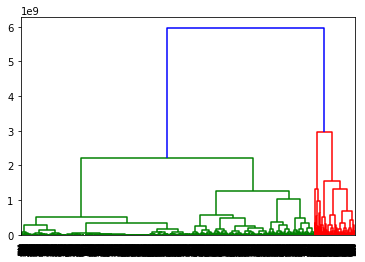

In [43]:
dend = shc.dendrogram(shc.linkage(data, method='ward'))

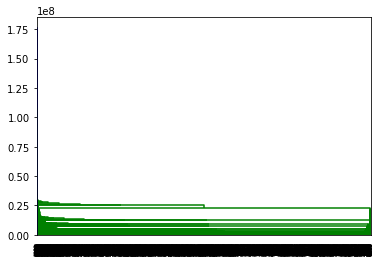

In [10]:
## get the dendograms

dends = shc.dendrogram(shc.linkage(data, method='single'))   
plt.show(dends)

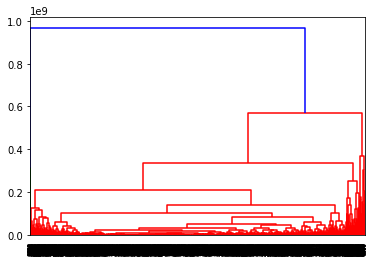

In [11]:
dendc = shc.dendrogram(shc.linkage(data, method='complete'))
plt.show(dendc)

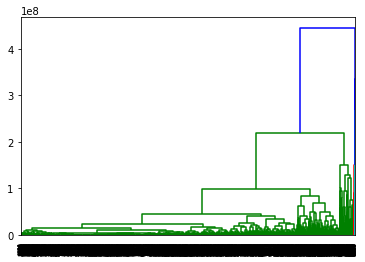

In [12]:
denda = shc.dendrogram(shc.linkage(data, method='average'))
plt.show(denda)

For these cluster plots, I heeded the hint and tested n_clusters up to 20, but as clusters increased the data grew less comprehensible. 

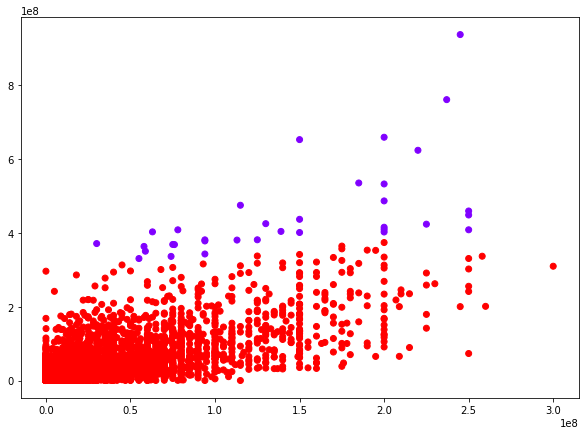

In [53]:
## plot the clusters; i settled on n_clusters = 2 since if you check the graph 
##if we draw a horizontal line that passes through longest distance without a
#horizontal line, we get 2
#(average)
# red = low budget movies
# purple = higher budget, higher gross
# overall, higher budget yields higher gross

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')  
clustering = cluster.fit_predict(data)

plt.figure(figsize=(10, 7))  
plt.scatter(data[:,0], data[:,1], c=clustering, cmap='rainbow')
plt.show()

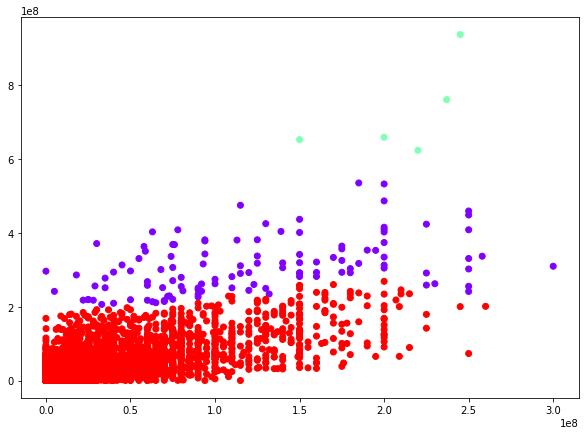

In [52]:
## plot the clusters; i settled on n_clusters = 3 since if you check the graph 
##if we draw a horizontal line that passes through longest distance without a
#horizontal line, we get 3 
#(complete)
# red = low budget movies
# purple = medium budget, medium gross
# green = higher budget, higher gross
# overall, higher budget yields higher gross

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')  
clustering = cluster.fit_predict(data)

plt.figure(figsize=(10, 7))  
plt.scatter(data[:,0], data[:,1], c=clustering, cmap='rainbow')
plt.show()

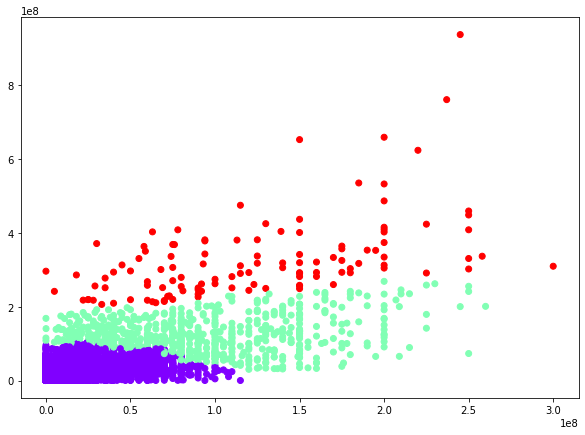

In [108]:
## plot the clusters; i settled on n_clusters = 3 since if you check the graph 
##if we draw a horizontal line that passes through longest distance without a
#horizontal line, we get 3
#(ward), i really like this one compared to the others
# purple = low budget movies, lower gross earnings
# green = medium budget, medium gross
# red = high budget, high gross earnings
# overall, higher budget yields higher gross

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
clustering = cluster.fit_predict(data)

plt.figure(figsize=(10, 7))  
plt.scatter(data[:,0], data[:,1], c=clustering, cmap='rainbow')
plt.show()

Of course, the data in the scatter can be changed to analyze different relationships. 
I'll change it around when I normalize the data.

In [2]:
#scaling data
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=['budget', 'gross', 'runtime', 'score', 'votes'])
data_scaled

,budget,gross,runtime,score,votes
0,0.151238,0.988481,1.682524e-06,1.531286e-07,0.005656
1,0.085236,0.996354,1.463213e-06,1.108064e-07,0.003761
2,0.083137,0.996537,6.096704e-07,3.824296e-08,0.001313
3,0.212282,0.977189,1.572035e-06,9.638753e-08,0.006198
4,0.436233,0.899832,4.362326e-06,3.344450e-07,0.001776
...,...,...,...,...,...
6815,0.000000,0.999998,1.915585e-05,1.136721e-06,0.001928
6816,0.000000,0.997619,3.165035e-03,1.723186e-04,0.068892
6817,0.679875,0.733294,1.476300e-05,1.262625e-06,0.007058
6818,0.000000,0.966057,2.825925e-03,2.305360e-04,0.258312


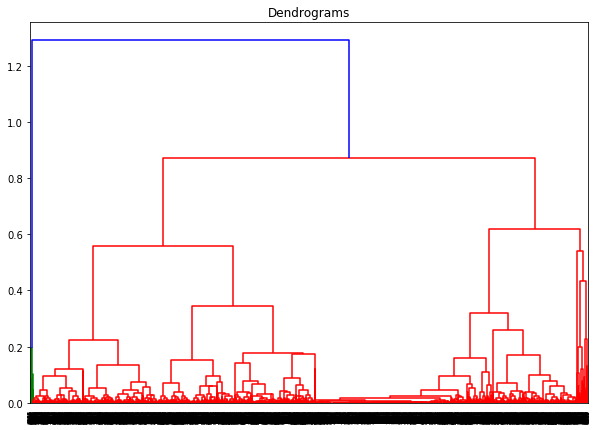

In [73]:
#plotting the dendrogram
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
denda = shc.dendrogram(shc.linkage(data_scaled, method='average'))


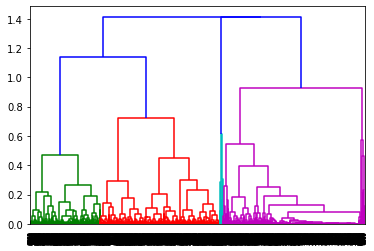

In [79]:
#this dendrogram already looks much nicer than the previous ones, i'll try a couple more methods
dendc = shc.dendrogram(shc.linkage(data_scaled, method='complete'))
plt.show(dendc)

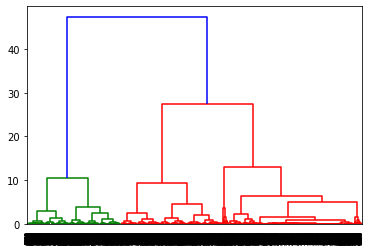

In [78]:
#ward
dendw = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.show(dendw)

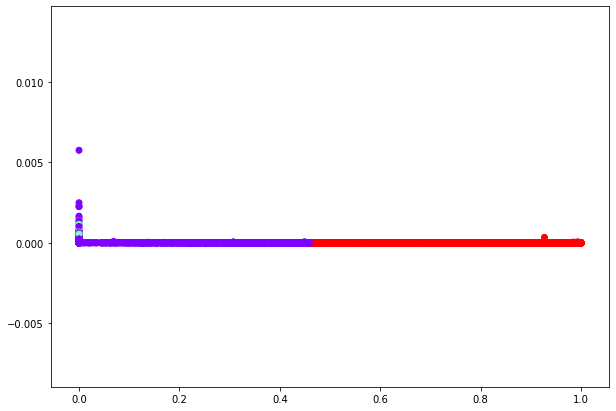

In [106]:
#this looks a bit weird but it makes sense. I played around with it and 
#I'll take a look at budget vs scores here
#but the purple indicates movies with low ratings and low budgets,
#green is movies that have low budget and low ratings
#red is movies that have high budgets and high scores

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')  
clustering = cluster.fit_predict(data_scaled)
plt.figure(figsize=(10, 7))
plt.scatter(data_scaled.iloc[:,0], data_scaled.iloc[:,3], c=cluster.labels_, cmap='rainbow')

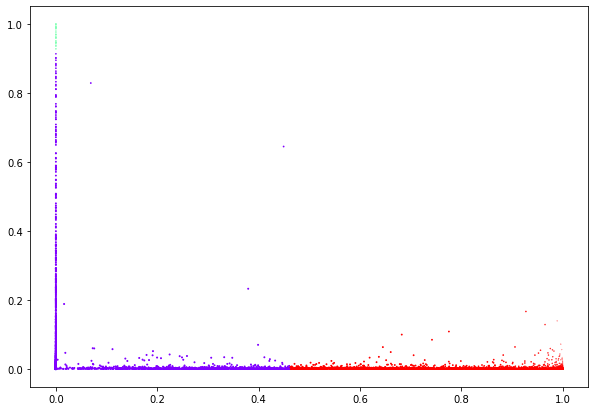

In [42]:
#this doesnt look right? something similar can be done with
#budget vs votes here
#but the purple indicates movies with few votes and low budgets
#green is movies that have low budget and few votes
#red is movies that have high budgets and many votes
#iwe can also add a third variable into the scatter

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')  
clustering = cluster.fit_predict(data_scaled)
plt.figure(figsize=(10, 7))
plt.scatter(data_scaled.iloc[:,0], data_scaled.iloc[:,4], data_scaled.iloc[:,1], c=cluster.labels_, cmap='rainbow')

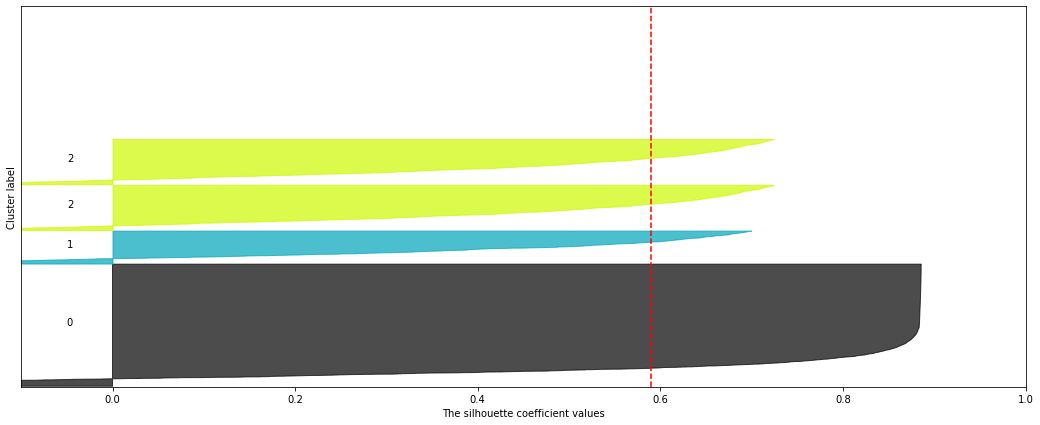

In [149]:
# Calculate the shilouette value for each data point for 3 clusters

n_clusters = 3


fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(data_scaled) + (n_clusters + 1) * 10])

preds = cluster.labels_

sample_silhouette_values = silhouette_samples(data_scaled, preds)
y_lower = 10

for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[preds == i]
        
    ith_cluster_silhouette_values.sort()
       
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
        
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
                          
    y_lower = y_upper + 10

ith_cluster_silhouette_values = sample_silhouette_values[preds == i]
ith_cluster_silhouette_values.sort()
size_cluster_i = ith_cluster_silhouette_values.shape[0]
y_upper = y_lower + size_cluster_i
color = cm.nipy_spectral(float(i) / n_clusters)
ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values,facecolor=color, edgecolor=color, alpha=0.7)
ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.axvline(x=np.mean(sample_silhouette_values), color="red", linestyle="--")
ax1.set_yticks([])
plt.savefig("samples-shilouette.png")
#plt.show()

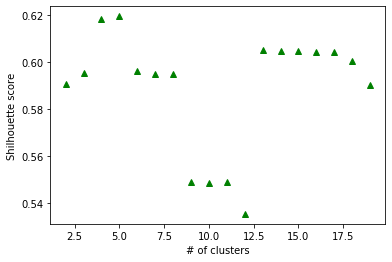

In [111]:
# Calculate the overall shilhouette for different linkages and different clusters

score = []

for n_clusters in range(2,20):
	cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='complete')
	preds = cluster.fit_predict(data_scaled)	
	score.append(silhouette_score (data_scaled, preds, metric='euclidean'))

fig, (ax1) = plt.subplots(1, 1)
plt.plot(range(2,20),score, 'g^')
plt.xlabel('# of clusters')
plt.ylabel('Shilhouette score')
plt.show()

After visualizing the data on a 2D scatter, we can see that there is a dramatic dip in silhouette score at 8 or 9 clusters. In terms of visual separability, it seems that 3-5 clusters have the highest silhouette score, indicating that visual separability will be best with clusters there. 

I'll try k_means here for fun.

In [112]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 9)

In [145]:
data_scaled

,budget,gross,runtime,score,votes
0,0.151238,0.988481,1.682524e-06,1.531286e-07,0.005656
1,0.085236,0.996354,1.463213e-06,1.108064e-07,0.003761
2,0.083137,0.996537,6.096704e-07,3.824296e-08,0.001313
3,0.212282,0.977189,1.572035e-06,9.638753e-08,0.006198
4,0.436233,0.899832,4.362326e-06,3.344450e-07,0.001776
...,...,...,...,...,...
6815,0.000000,0.999998,1.915585e-05,1.136721e-06,0.001928
6816,0.000000,0.997619,3.165035e-03,1.723186e-04,0.068892
6817,0.679875,0.733294,1.476300e-05,1.262625e-06,0.007058
6818,0.000000,0.966057,2.825925e-03,2.305360e-04,0.258312


In [146]:
X = data_scaled[['budget','runtime','score']]
y = data_scaled[['gross']]

In [147]:
# Initializing KMeans
kmeans = KMeans(n_clusters=3)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
print(C)

[[8.96294057e-01 1.28186326e-05 8.09023836e-07]
 [3.07310545e-02 6.71426746e-04 4.15191826e-05]
 [4.96438413e-01 6.03099178e-06 3.94546097e-07]]


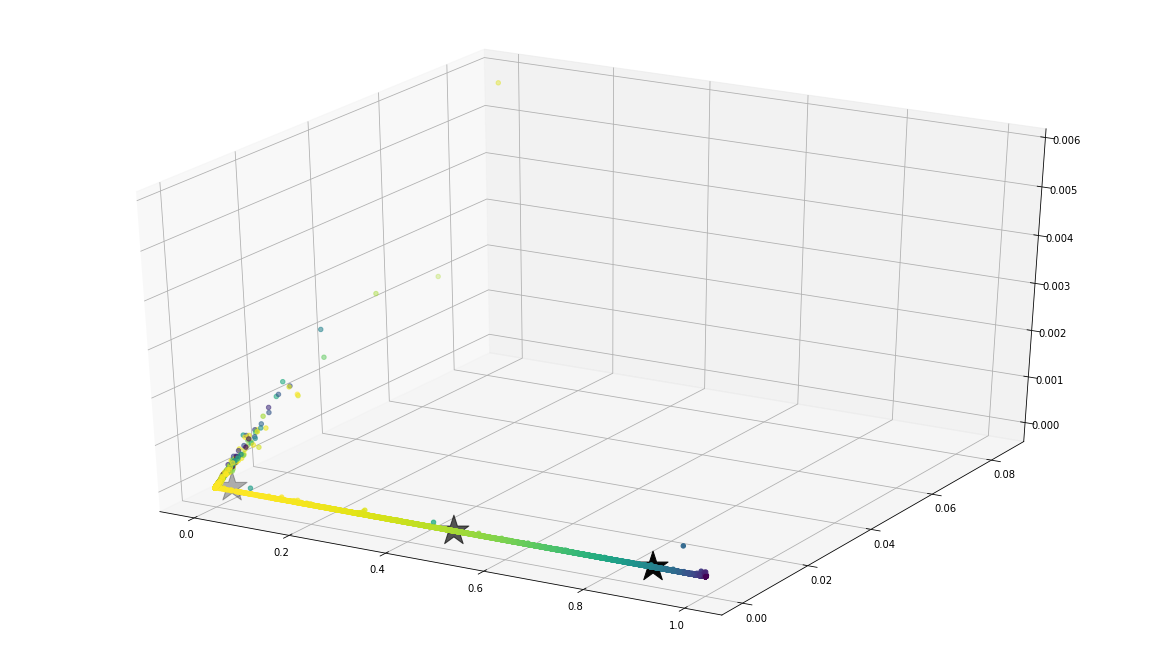

In [148]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X['budget'], X['runtime'], X['score'], c=y['gross'])
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)

This pretty much resulted in a similar shape to the HAC method.

Here, I'll visualize the data on a 2D plot using PCA.

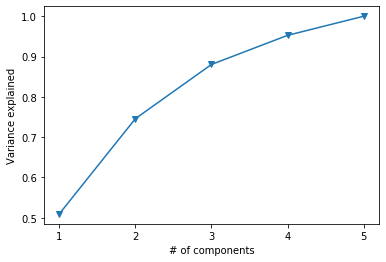

In [4]:
from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA

# standardize the data
X_std = StandardScaler().fit_transform(df)

# run PCA on the standardized data

variance_explained = []

for n_components in [1,2,3,4,5]:
	sklearn_pca = sklearnPCA(n_components=n_components)
	Y_sklearn = sklearn_pca.fit_transform(X_std)
	variance_explained.append(sum(sklearn_pca.explained_variance_ratio_))

plt.plot([1,2,3,4,5],variance_explained, '-v')
plt.xlabel('# of components')
plt.ylabel('Variance explained')
plt.xticks([1,2,3,4,5])
plt.show()

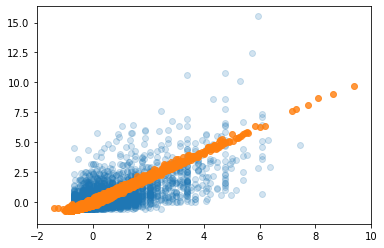

In [34]:
#reduce into a single dimension and plot against each other

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_std)
X_pca = pca.transform(X_std)
X_new = pca.inverse_transform(X_pca)
plt.scatter(X_std[:, 0], X_std[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
